In [40]:
# Machine Learning을 위한 Library
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets

# File I/O 를 위한 Library
import pandas as pd
from os.path import join

class RecommendationModel:
    def __init__(self):
        self.scaler = StandardScaler()
        self.model = self.build_model()

    def build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(32, activation='relu', input_shape=(3,)),  # Adjust input shape and layer configuration
            keras.layers.Dense(16, activation='relu'),
            keras.layers.Dense(1, activation='linear')
        ])
        model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
        return model

    def train(self, X, y, epochs=100, batch_size=32, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        self.scaler.fit(X_train)
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        self.model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

    def evaluate(self, X, y):
        X_scaled = StandardScaler().transform(X)
        loss, mae = self.model.evaluate(X_scaled, y)
        return loss, mae

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        predictions = self.model.predict(X_scaled)
        return predictions

In [41]:
placesDF = pd.read_csv('train_data.csv', encoding = 'cp949')

In [42]:
placesDF['선호도'] = 0

Meat_pre = 1
Noodle_pre = 2
Rice_pre = 3
FastFood_pre = 4

In [43]:
Meat = ['닭발', '곱창,막창,양', '돼지고기구이', '스테이크,립', '정육식당', '육류,고기요리', '돈가스', '고기뷔페', '양식', '족발,보쌈', '소고기구이', '닭갈비', '치킨,닭강정', '만두']
Noodle = ['중식당', '국수', '아시아음식', '우동,소바']
Rice = ['죽', '한식', '보리밥', '국밥', '김밥', '감자탕', '한정식', '백반,가정식']
FastFood = ['햄버거', '베이커리', '피자']

preference_dict = {
    'Meat': Meat,
    'Noodle': Noodle,
    'Rice': Rice,
    'FastFood': FastFood
}

In [44]:
for category, preferences in preference_dict.items():
    placesDF.loc[placesDF['종류'].isin(preferences), '선호도'] = placesDF['선호도'] + {
        'Meat': Meat_pre,
        'Noodle': Noodle_pre,
        'Rice': Rice_pre,
        'FastFood': FastFood_pre
    }[category]

In [54]:
placesDF['추천율'] = 0
placesDF['추천율'] = placesDF['별점'].values * placesDF['선호도'] + (placesDF['리뷰'].values * 0.01)

In [56]:
X = placesDF[['별점', '리뷰', '선호도']].values   # 거리 추가해야 함 
y = placesDF['추천율'].values

In [57]:
# 모델 생성
model = RecommendationModel()
model.train(X, y, epochs = 300)

# 여기 X에는 실제 데이터가 들어가야합니다! (지금은 잘 나오나 원래 데이터로 돌려봤어요.)
Predict_data = model.predict(X)

Epoch 1/300
2/2 [==============================] - 0s 88ms/step - loss: 181.3120 - mae: 12.6606 - val_loss: 80.9267 - val_mae: 8.0966
Epoch 2/300
2/2 [==============================] - 0s 29ms/step - loss: 179.9488 - mae: 12.6052 - val_loss: 80.2092 - val_mae: 8.0524
Epoch 3/300
2/2 [==============================] - 0s 15ms/step - loss: 178.7213 - mae: 12.5551 - val_loss: 79.5075 - val_mae: 8.0089
Epoch 4/300
2/2 [==============================] - 0s 29ms/step - loss: 177.5523 - mae: 12.5068 - val_loss: 78.8272 - val_mae: 7.9666
Epoch 5/300
2/2 [==============================] - 0s 14ms/step - loss: 176.4297 - mae: 12.4588 - val_loss: 78.1717 - val_mae: 7.9258
Epoch 6/300
2/2 [==============================] - 0s 31ms/step - loss: 175.2885 - mae: 12.4121 - val_loss: 77.5255 - val_mae: 7.8856
Epoch 7/300
2/2 [==============================] - 0s 18ms/step - loss: 174.2658 - mae: 12.3671 - val_loss: 76.8818 - val_mae: 7.8464
Epoch 8/300
2/2 [==============================] - 0s 14ms/ste

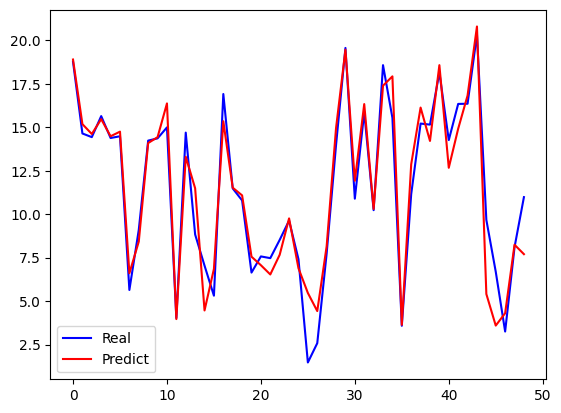

In [58]:
plt.plot(y, label = 'Real', color = 'b')
plt.plot(Predict_data, label = 'Predict', color = 'r')
plt.legend()
plt.show()